# 1. IMPORT NECESSARY LIBRARIES

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold
import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [3]:
wine_data = load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
wine_data_df = pd.DataFrame(data = wine_data.data,columns=wine_data.feature_names)
wine_data_df['target']= wine_data.target

In [6]:
wine_data_df['target']=wine_data.target
wine_data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# data understanding

In [7]:
wine_data_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
wine_data_df.shape

(178, 14)

In [8]:
wine_data_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

## Model building

In [11]:
X = wine_data_df.drop(labels='target',axis =1)
y = wine_data_df[['target']]
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [12]:
X.shape,y.shape

((178, 13), (178, 1))

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,stratify = y,shuffle =True,random_state = 12)

In [14]:
X_train.shape,y_train.shape

((142, 13), (142, 1))

In [15]:
X_test.shape,y_test.shape

((36, 13), (36, 1))

## Model Training || Model Testing || Model Evaluation

# for k=3

In [16]:
knn_classifer = KNeighborsClassifier(n_neighbors=3)
knn_classifer.fit(X_train,y_train)
y_pred = knn_classifer.predict(X_train)
y_pred


array([1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1,
       2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0,
       1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [17]:
print("Accuracy score: ",round(accuracy_score(y_train,y_pred),4))

Accuracy score:  0.8239


## For k=5

In [18]:
knn_classifer = KNeighborsClassifier(n_neighbors=5)
knn_classifer.fit(X_train,y_train)
y_pred = knn_classifer.predict(X_train)
print("Accuracy score: ",round(accuracy_score(y_train,y_pred),4))



Accuracy score:  0.7606


## For k=7

In [20]:
knn_classifer = KNeighborsClassifier(n_neighbors=7)
knn_classifer.fit(X_train,y_train)
y_pred = knn_classifer.predict(X_train)
print("Accuracy score: ",round(accuracy_score(y_train,y_pred),4))




Accuracy score:  0.7535


## For k=9

In [21]:
knn_classifer = KNeighborsClassifier(n_neighbors=9)
knn_classifer.fit(X_train,y_train)
y_pred = knn_classifer.predict(X_train)
print("Accuracy score: ",round(accuracy_score(y_train,y_pred),4))





Accuracy score:  0.7676


## Applying standardization  it is working on distance based concept

In [22]:
std_scalar = StandardScaler()
std_scalar = std_scalar.fit_transform(X)
x_scaled = pd.DataFrame(data = std_scalar,columns=X.columns)
x_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [23]:

X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,stratify = y,shuffle =True,random_state = 12)

X_train.shape,y_train.shape

((142, 13), (142, 1))

In [24]:
X_test.shape,y_test.shape

((36, 13), (36, 1))

In [25]:
knn_classifer = KNeighborsClassifier(n_neighbors=3)
knn_classifer.fit(X_train,y_train)
y_pred = knn_classifer.predict(X_train)
y_pred



array([1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0,
       1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [26]:


## For k=5

knn_classifer = KNeighborsClassifier(n_neighbors=5)
knn_classifer.fit(X_train,y_train)

y_pred = knn_classifer.predict(X_train)

print("Accuracy score: ",round(accuracy_score(y_train,y_pred),4))


Accuracy score:  0.9789


In [27]:
knn_classifer = KNeighborsClassifier(n_neighbors=5)
knn_classifer.fit(X_train,y_train)
y_pred = knn_classifer.predict(X_train)
print("Accuracy score: ",round(accuracy_score(y_train,y_pred),4))




Accuracy score:  0.9789


In [28]:
knn_classifer = KNeighborsClassifier(n_neighbors=9)
knn_classifer.fit(X_train,y_train)
y_pred = knn_classifer.predict(X_train)
print("Accuracy score: ",round(accuracy_score(y_train,y_pred),4))






Accuracy score:  0.9718


In [29]:
knn_classifer = KNeighborsClassifier(n_neighbors=7)
knn_classifer.fit(X_train,y_train)
y_pred = knn_classifer.predict(X_train)
print("Accuracy score: ",round(accuracy_score(y_train,y_pred),4))






Accuracy score:  0.9789


## How to choose optimal number for neighbours?


In [47]:
kfold = KFold(n_splits=5,shuffle=True,random_state=14)
cv_scores = []
for i in range(1,31,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_validation_score = cross_val_score(estimator=knn_model,X =x_scaled,y =y,cv = kfold)
    cross_validation_score.mean()
    print(i,'th iteration :\n',cross_validation_score.mean().round(4))
    cv_scores.append(cross_validation_score.mean().round(4))
    

1 th iteration :
 0.9608
3 th iteration :
 0.9606
5 th iteration :
 0.9608
7 th iteration :
 0.9663
9 th iteration :
 0.9663
11 th iteration :
 0.9608
13 th iteration :
 0.9608
15 th iteration :
 0.9608
17 th iteration :
 0.9606
19 th iteration :
 0.9606
21 th iteration :
 0.9663
23 th iteration :
 0.9721
25 th iteration :
 0.9721
27 th iteration :
 0.9721
29 th iteration :
 0.9721


In [48]:
cv_scores


[0.9608,
 0.9606,
 0.9608,
 0.9663,
 0.9663,
 0.9608,
 0.9608,
 0.9608,
 0.9606,
 0.9606,
 0.9663,
 0.9721,
 0.9721,
 0.9721,
 0.9721]

In [49]:
max(cv_scores)

0.9721

In [50]:
cv_scores.index(max(cv_scores))

11

## using Visuals

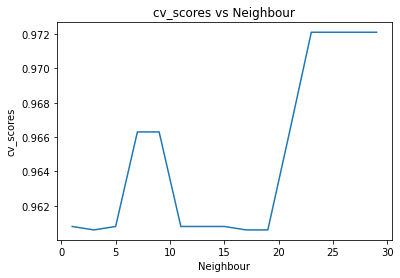

In [51]:
plt.plot(range(1,31,2),cv_scores)
plt.xlabel('Neighbour')
plt.ylabel('cv_scores')
plt.title('cv_scores vs Neighbour')
plt.show()